In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
print('imports completed')



imports completed


In [2]:
# 1. Paths (update if needed)
base_dir = '/content/drive/MyDrive/Colab Notebooks/Data/chest_xray 2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
print('paths completed')

paths completed


In [3]:
# 2. Data Preprocessing

#apply ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2)

#ImageDataGenerator(
#    rescale=1./255,
    #rotation_range=20,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #shear_range=0.1,
    #zoom_range=0.1,
    #horizontal_flip=True
#)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=0,
    restore_best_weights=True
)


print('data preprocessing completed')

Found 5226 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 623 images belonging to 2 classes.
data preprocessing completed


In [4]:
# 3. Simple CNN Model
#Experiment adding layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])
print('CNN completed')


CNN completed


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 4. Train Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3,
    callbacks=[early_stop]
)
print('training completed')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
164/164 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.7695 - loss: 0.4965 - val_accuracy: 0.6250 - val_loss: 0.9884
Epoch 2/3
164/164 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.9136 - loss: 0.2298 - val_accuracy: 0.8125 - val_loss: 0.3818
Epoch 3/3
164/164 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.9195 - loss: 0.1999 - val_accuracy: 0.6875 - val_loss: 0.8197
training completed


In [6]:
# 5. Evaluate on Test Set

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

y_pred_probs = model.predict(test_generator)


y_pred = (y_pred_probs > 0.5).astype('int').flatten()

y_true = test_generator.classes
print('Accuracy Done')

20/20 ━━━━━━━━━━━━━━━━━━━━ 129s 7s/step - accuracy: 0.6318 - loss: 0.7988
Test Accuracy: 0.79
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 845ms/step
Accuracy Done


In [7]:
# 6. Confusion Matrix and Report
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

# Plot confusion matrix




Confusion Matrix:
[[129 105]
 [ 20 369]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.55      0.67       234
           1       0.78      0.95      0.86       389

    accuracy                           0.80       623
   macro avg       0.82      0.75      0.76       623
weighted avg       0.81      0.80      0.79       623



In [8]:
#### TESTING SINGLE IMAGE

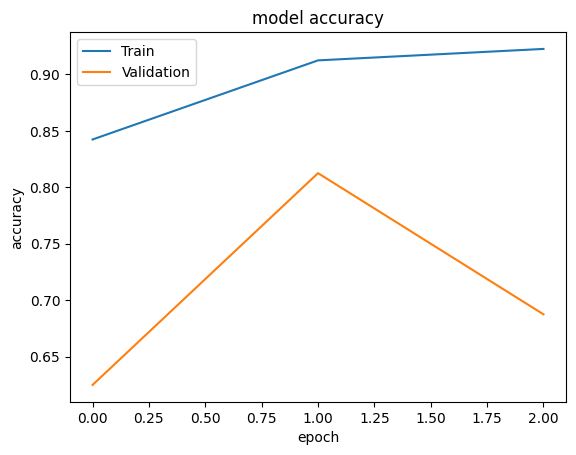

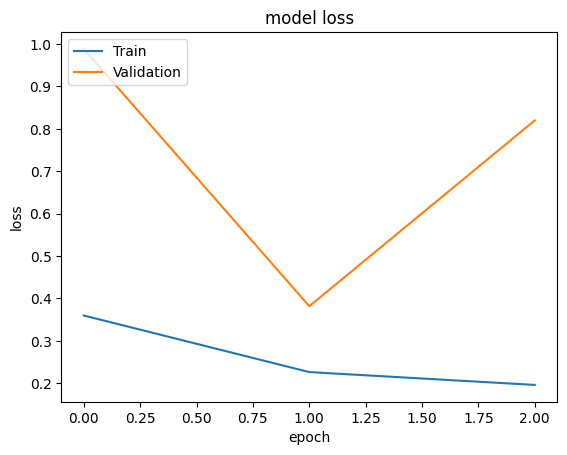

In [9]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#figure out why model is overfitting
#validation is low, but train is high, not generalizing
#100, 100, 0, 0 or 70, 70, 70, 70
#layers, data augmentation, epochs,